### 导入autoload扩展

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 下载并载入[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)数据集

In [35]:
from utils import *
from full_connect_network import FullConnectNet
from solve import Solver
from itertools import product
from copy import deepcopy

data = download_minist()
data['X_train'] = data['X_train']
data['y_train'] = data['y_train']

### 封装训练函数

In [36]:
def train_with_params(
        hidden_dims, 
        activation, 
        reg: float=0.01, 
        update_rule: str='sgd',
        optim_config: Dict={
            'learning_rate': 1e-3
        },
        lr_decay: float=0.9,
        batch_size: int=64,
        iters: int=6000,
        epochs: int=10,
        data: Dict=data,
        plot: bool=True,
        verbose: bool=True
    ):
    
    three_layer_model = FullConnectNet(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
    )

    three_layer_net = Solver(
        model=three_layer_model, 
        data=data,
        update_rule=update_rule,
        optim_config=optim_config,
        lr_decay=lr_decay,
        batch_size=batch_size,
        print_iter=500,
        iters=iters,
        num_epochs=epochs,
        verbose=verbose
    )

    three_layer_net.train() 
    if plot:
        plot_stats_single(three_layer_net) 
    return three_layer_net

### 过拟合小数据集

(Time   0.00 s; Iteration     1 /  2000) loss 2.363608
[Epoch  0 / 10] train accuracy: 0.110000; val accuracy: 0.104200
[Epoch  1 / 10] train accuracy: 0.704000; val accuracy: 0.649800
[Epoch  2 / 10] train accuracy: 0.820000; val accuracy: 0.708300
(Time   1.71 s; Iteration   501 /  2000) loss 0.466822
[Epoch  3 / 10] train accuracy: 0.902000; val accuracy: 0.756000
[Epoch  4 / 10] train accuracy: 0.944000; val accuracy: 0.769200
[Epoch  5 / 10] train accuracy: 0.960000; val accuracy: 0.774100
(Time   3.00 s; Iteration  1001 /  2000) loss 0.234394
[Epoch  6 / 10] train accuracy: 0.976000; val accuracy: 0.771700
[Epoch  7 / 10] train accuracy: 0.994000; val accuracy: 0.775800
(Time   4.11 s; Iteration  1501 /  2000) loss 0.153984
[Epoch  8 / 10] train accuracy: 0.998000; val accuracy: 0.776700
[Epoch  9 / 10] train accuracy: 1.000000; val accuracy: 0.775000
[Epoch 10 / 10] train accuracy: 1.000000; val accuracy: 0.777300


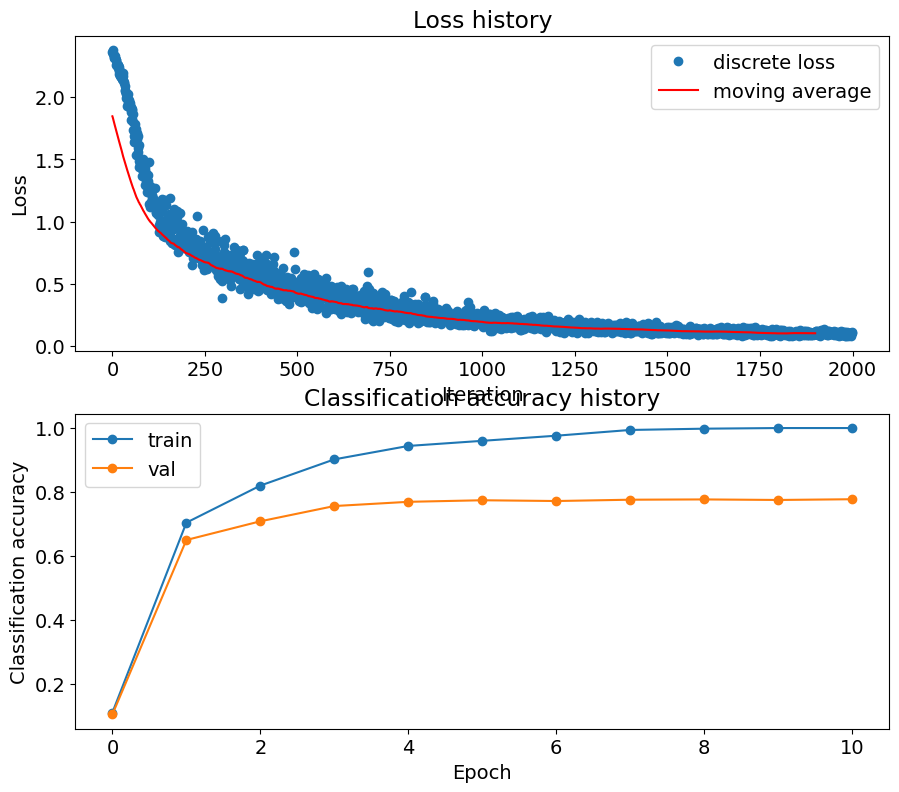

In [37]:
np.random.seed(419)
# get the first 500 samples of the testing dataset
small_data = deepcopy(data)
small_data['X_train'] = small_data['X_train'][:500]
small_data['y_train'] = small_data['y_train'][:500]

hidden_dims = [128, 64]
activation = ['relu']
iters=2000

small_nn = train_with_params(
    hidden_dims=hidden_dims,
    activation=activation,
    iters=iters,
    data=small_data
)

### 尝试不同组合的激活函数

Activation: (   relu,    relu) has been trained successfully!
Activation: (   relu, sigmoid) has been trained successfully!
Activation: (   relu,    tanh) has been trained successfully!
Activation: (sigmoid,    relu) has been trained successfully!
Activation: (sigmoid, sigmoid) has been trained successfully!
Activation: (sigmoid,    tanh) has been trained successfully!
Activation: (   tanh,    relu) has been trained successfully!
Activation: (   tanh, sigmoid) has been trained successfully!
Activation: (   tanh,    tanh) has been trained successfully!


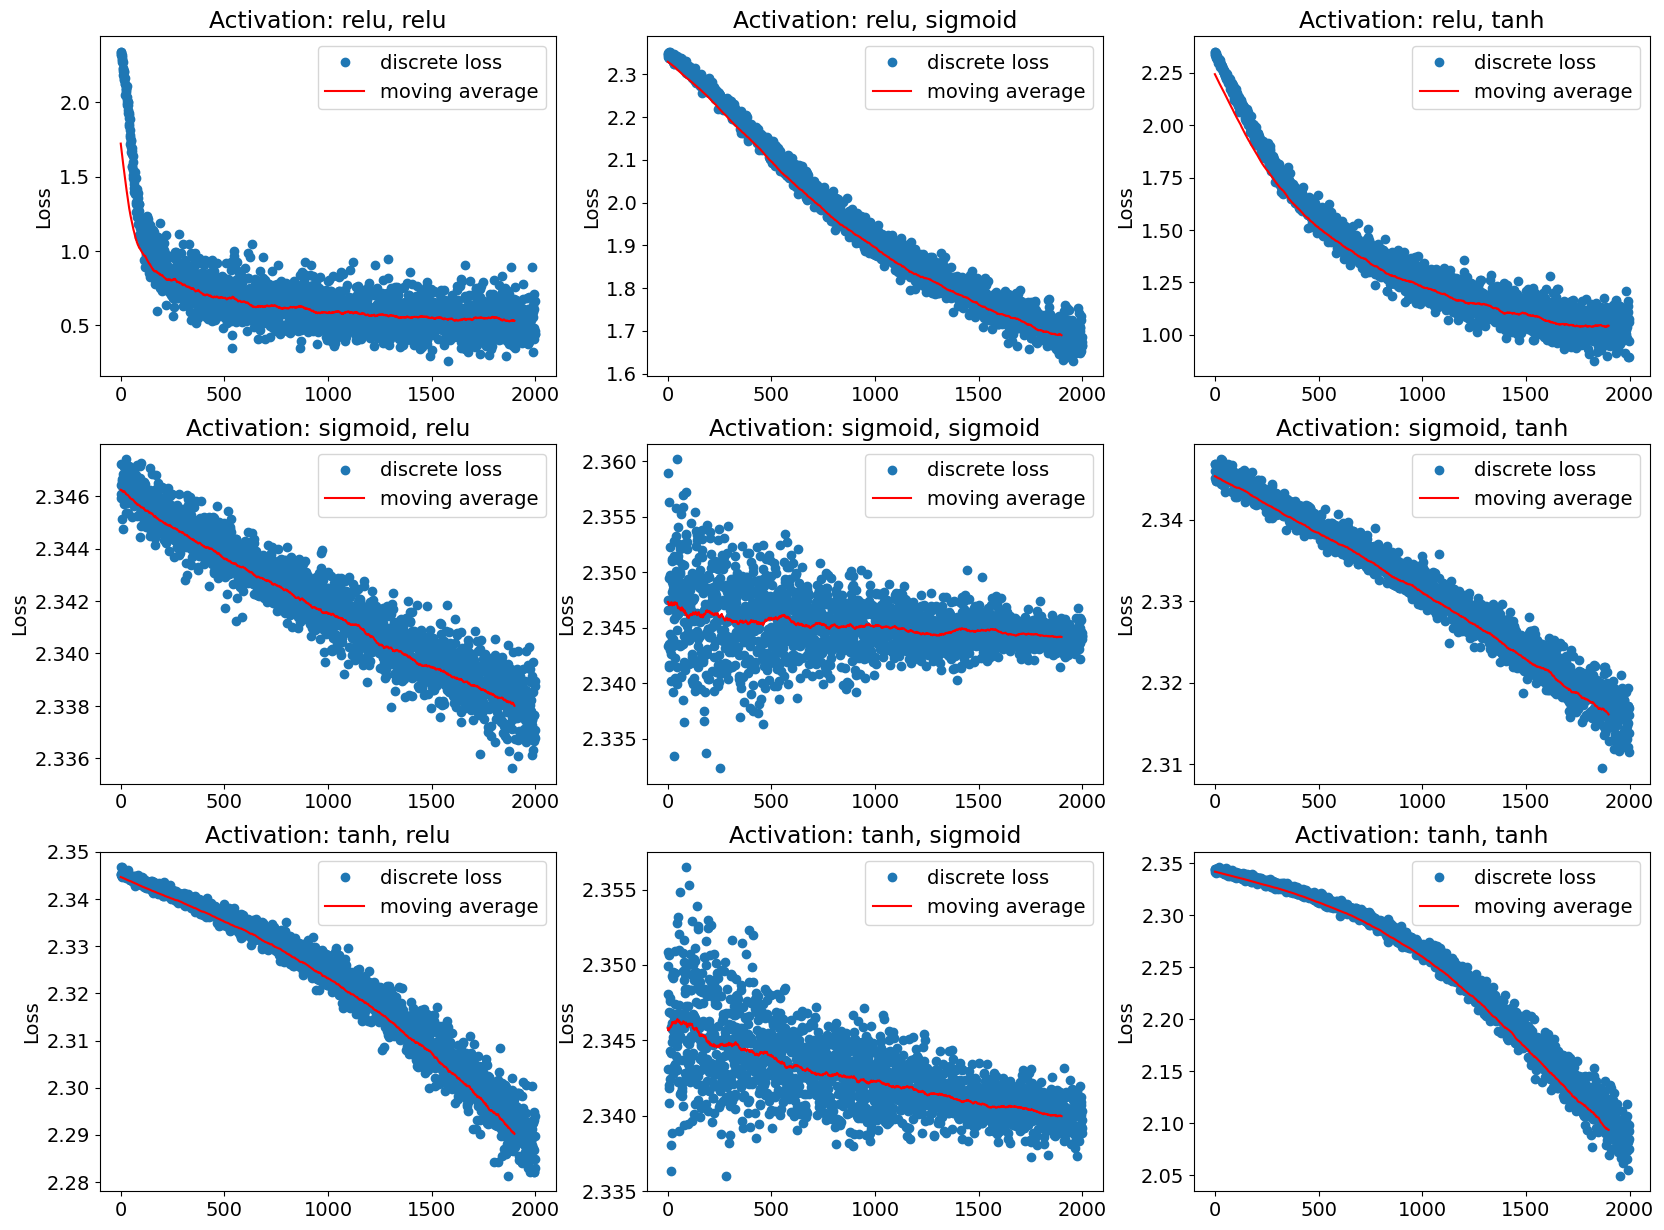

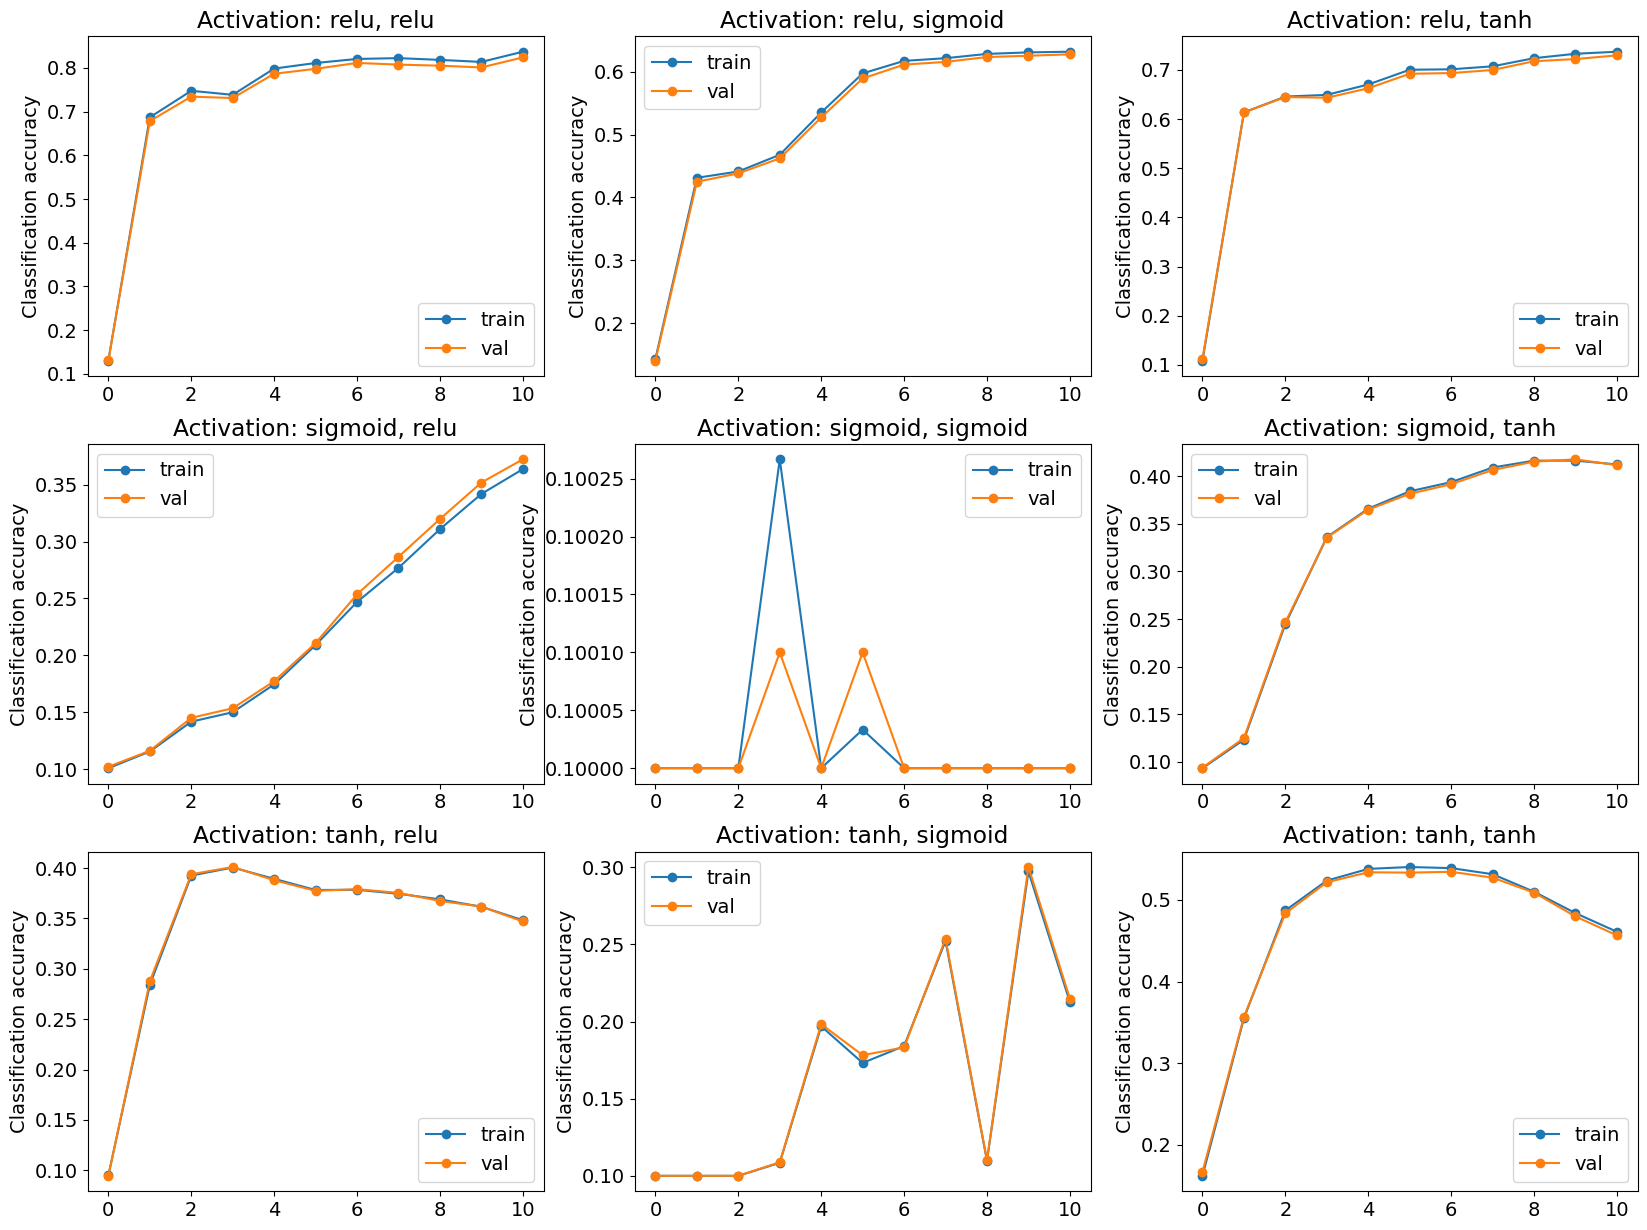

In [45]:
np.random.seed(424)

activations = ['relu', 'sigmoid', 'tanh']
avtivation_config = list(product(activations, activations))
window_size = 100

# train the model based on different activation functions
nets = []

for config in avtivation_config:
    act_nn = train_with_params(
        hidden_dims=hidden_dims,
        activation=list(config),
        iters=iters,
        plot=False,
        verbose=False
    )
    nets.append(act_nn)
    print('Activation: ({:>7}, {:>7}) has been trained successfully!'.format(*config))

# plot the training loss
fig_loss, axes_loss = plt.subplots(3, 3, figsize=(20, 15))
axes_loss = axes_loss.flatten()

for act_nn, ax in zip(nets, axes_loss): 
    ax.plot(act_nn.loss_hist, 'o', label='discrete loss')
    ax.plot([sum(act_nn.loss_hist[i:i+window_size])/window_size for i in range(len(act_nn.loss_hist)-window_size)], 'red', label='moving average')
    ax.set_title('Activation: {}, {}'.format(act_nn.model.params['A1'], act_nn.model.params['A2']))
    ax.set_ylabel("Loss")
    ax.legend()

# plot the accuracy curve
fig_acc, axes_acc = plt.subplots(3, 3, figsize=(20, 15))
axes_acc = axes_acc.flatten()

for act_nn, ax in zip(nets, axes_acc):
    ax.plot(act_nn.train_acc_hist, 'o-', label='train')
    ax.plot(act_nn.val_acc_hist, 'o-', label='val')
    ax.legend()
    ax.set_title('Activation: {}, {}'.format(act_nn.model.params['A1'], act_nn.model.params['A2']))
    ax.set_ylabel('Classification accuracy')


### 权重初始化大小，正则化参数，学习率，学习率下降

### 不同的更新方式

### 完整训练

In [ ]:
np.random.seed(419)

hidden_dims = [128, 64]
activation = ['relu', 'tanh']
reg = 1e-3

update_rule = 'sgd'
optim_config = {
    'learning_rate': 5e-3
}
lr_decay=0.9
batch_size=64
print_iter=500
iters=60000
epochs=30

nn = train_with_params(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
        update_rule=update_rule,
        optim_config=optim_config,
        lr_decay=lr_decay,
        batch_size=batch_size,
        iters=iters,
        epochs=epochs
    )

# model_path = 'fcnn'
# nn.save(model_path)

```python
# sgd_momentum
{
    hidden_dims = [128, 64, 32]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'
    three_layer_model = FullConnectNet(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
        loss=loss
    )
    three_layer_net = Solver(
        model=three_layer_model, 
        data=data,
        update_rule='sgd_momentum',
        optim_config = {
            'learning_rate': 1e-2
        },
        lr_decay=0.9 / 0.8,
        batch_size=64,
        print_iter=100
    )
}
# adam
{
    hidden_dims = [64, 32]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'

    update_rule = 'adam'
    optim_config = {
        'learning_rate': 1e-4
    }
    lr_decay=0.8
    batch_size=128
    print_iter=500
    iters=20000
}
# sgd
{
    hidden_dims = [128, 64]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'

    update_rule = 'sgd'
    optim_config = {
        'learning_rate': 5e-3
    }
    lr_decay=0.9
    batch_size=64
    print_iter=500
    iters=2000
}

```